#Project 2- Recommender Systems

In [1]:
#!pip install pandas
#!pip install numpy
!pip install regex
!pip install nltk
!pip install sklearn
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel
!pip install scikit-surprise

import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import regex as re
import random
import nltk
import multiprocessing
import umap.umap_ as umap
import umap.plot
import re
import string
import warnings


from surprise import Reader, Dataset
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection import cross_validate, KFold, train_test_split
from surprise import accuracy
from surprise import Reader, Dataset
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection import cross_validate, KFold, train_test_split
from sklearn.metrics import roc_curve, auc, mean_squared_error
from surprise.prediction_algorithms.matrix_factorization import NMF, SVD
np.random.seed(0)
random.seed(0)

You should consider upgrading via the 'c:\users\veera\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\veera\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\veera\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\veera\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\veera\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\veera\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [45]:
#Importing Drive
#runningOnColab = 'google.colab' in sys.modules
#if runningOnColab:
#from google.colab import drive
#drive.mount('/content/drive')
#%cd '/content/drive/Shareddrives/ECE219/Project 3'
%cd 'E:\Downloads\UCLA_Courses\Winter_2022\219_LargeScale_Data_Mining\Project_3\Synthetic_Movie_Lens-20220211T234626Z-001'

[WinError 123] The filename, directory name, or volume label syntax is incorrect: "'E:\\Downloads\\UCLA_Courses\\Winter_2022\\219_LargeScale_Data_Mining\\Project_3\\Synthetic_Movie_Lens-20220211T234626Z-001'"
C:\Users\veera\AppData\Local\Programs\Python\Python39\Scripts


In [2]:
Dataset_Rep = 'Dataset_Movie_Lens/'

In [3]:
#Ratings_file.head()
Dataset_loc = 'E:/Downloads/UCLA_Courses/Winter_2022/219_LargeScale_Data_Mining/Project_3/Synthetic_Movie_Lens-20220211T234626Z-001/Dataset_Movie_Lens/'
Dataset = pd.read_csv(Dataset_loc+"ratings.csv") 
Dataset.head()

,userId,movieId,rating,timestamp
0,496,112852,3.0,1415520462
1,391,1947,4.0,1030945141
2,387,1562,1.5,1095041022
3,474,2716,4.5,1053020930
4,483,88125,4.5,1311337237


In [48]:
Dataset.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501562,1.205946e+09
std,182.618491,35530.987199,1.042540,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


#Question 1

Explore the Dataset: In this question, we explore the structure of the data.

Compute the sparsity of the movie rating dataset:
Sparsity =
Total number of available ratings
Total number of possible ratings

In [4]:
Ratings_file = pd.read_csv(Dataset_loc+"ratings.csv",usecols=['userId','movieId','rating','timestamp']) 
user_ID = Ratings_file.pop('userId').values
movie_ID = Ratings_file.pop('movieId').values
Rating = Ratings_file.pop('rating').values
Sparsity = len(Rating)/(len(set(movie_ID))*len(set(user_ID)))
print('Sparsity:',Sparsity)

Sparsity: 0.016999683055613623


Plot a histogram showing the frequency of the rating values: Bin the raw rating values
into intervals of width 0.5 and use the binned rating values as the horizontal axis. Count the
number of entries in the ratings matrix R that fall within each bin and use this count as the
height of the vertical axis for that particular bin. Comment on the shape of the histogram.

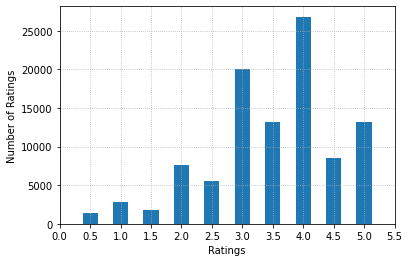

In [5]:
uni_values, uni_indices = np.unique(Rating, return_inverse=True)
plt.bar(uni_values, np.bincount(uni_indices), width=0.25)
locs, labels = plt.xticks()  
plt.grid(linestyle=':')
plt.xticks(np.arange(0,6,0.5),rotation=0)
plt.ylabel('Number of Ratings')
plt.xlabel('Ratings')
plt.savefig('Q2_1.png',dpi=500,bbox_inches='tight')
plt.show()

Plot the distribution of the number of ratings received among movies: The X-axis
should be the movie index ordered by decreasing frequency and the Y -axis should be the number
of ratings the movie has received; ties can broken in any way. A monotonically decreasing trend
is expected.

[329 317 307 ...   1   1   1]


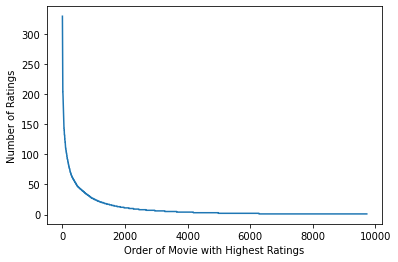

In [10]:
#Movie ID vs number of ratings
unique_movie,unique_counts=np.unique(movie_ID,return_counts=True)
count_sorts=np.argsort(unique_counts)
length=range(1,len(unique_movie)+1)
count=unique_counts[count_sorts[::-1]] #Decreasing Frequency
print(count)
plt.plot(length,count)
plt.xlabel('Order of Movie with Highest Ratings')
plt.ylabel('Number of Ratings')
plt.show()


Plot the distribution of ratings among users: The X-axis should be the user index ordered
by decreasing frequency and the Y -axis should be the number of movies the user has rated.
The requirement of the plot is similar to that in Question C.


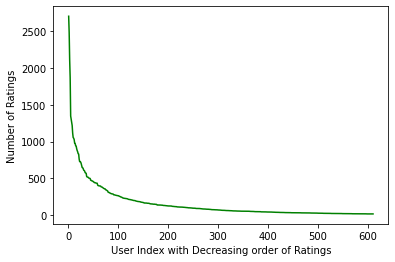

In [51]:
#User ID vs Number of movies the user has rated
unique_movie1,unique_counts1=np.unique(user_ID,return_counts=True)
count_sorts=np.argsort(unique_counts1)
length1=range(1,len(unique_movie1)+1)
count1=unique_counts1[count_sorts[::-1]] #Decreasing Frequency
#print(count1)
plt.plot(length1,count1,color='g')
plt.xlabel('User Index with Decreasing order of Ratings')
plt.ylabel('Number of Ratings')
plt.show()


Discuss the salient features of the distributions from Questions C,D and their implications
for the recommendation process.

Compute the variance of the rating values received by each movie: Bin the variance
values into intervals of width 0.5 and use the binned variance values as the horizontal axis.
Count the number of movies with variance values in the binned intervals and use this count as
the vertical axis. Briefly comment on the shape of the resulting histogram

In [14]:
movie_set=set(movie_ID)
movie_set=list(movie_set) #can't subscript set
list_movies=[]
list_variance=[]
for movie_ele in range(len(movie_set)):
  #For each  unique movie ID, find all it's indexes from the movie ID corpus to access corresponding ratings
  pos=[ind for ind,ele in enumerate(movie_ID) if ele==movie_set[movie_ele] ]
  #list of all corresponding rattings values to find variance of a single unique movie ID's ratings
  variance=np.var(np.array(Rating[pos]))
  list_variance.append(variance)
  list_movies.append(movie_set[movie_ele])

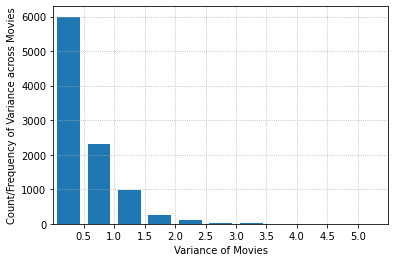

In [24]:
#Plotting histogram
plt.hist(list_variance, bins=np.arange(0,5.5,0.5),rwidth=0.75)
plt.xticks(np.arange(0.5,5.5,0.5))
plt.xlim([0, 5.5])
plt.grid(linestyle=':')
plt.xlabel('Variance of Movies')
plt.ylabel('Count/Frequency of Variance across Movies')
plt.show()

#Question 2

Understanding the Pearson Correlation Coefficient:


In [10]:
print(max(Rating),min(Rating))
#Ratings dynamic range is from 0.5 to 5


5.0 0.5


#Question 4

Design a k-NN collaborative filter to predict the ratings of the movies in the
original dataset and evaluate its performance using 10-fold cross validation. Sweep k (number of
neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE and average
MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot average RMSE (Y-axis)
against k (X-axis) and average MAE (Y-axis) against k (X-axis).

In [24]:
!pip install scikit-surprise
from surprise import Reader, Dataset
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection import cross_validate, KFold, train_test_split


#Get lineformat corresponding tags CSV file in dataset  - Documentation - https://surprise.readthedocs.io/en/stable/reader.html
CSV_reader=Reader(rating_scale=(0.5, 5),skip_lines=1,sep=',', line_format='user item rating timestamp')
Dataset_Ratings=Dataset.load_from_file(Dataset_loc+'ratings.csv',reader=CSV_reader)

k=np.arange(2,102,2) 
list_RMSE=[]
lisst_mae=[]
for ele in k:
  knn=KNNWithMeans(k=ele,sim_options={'name':'pearson'})
  final_res=cross_validate(knn,measures=['rmse','mae'],data=Dataset_Ratings,cv=10)
  list_RMSE.append(np.mean(final_res['test_rmse']))
  lisst_mae.append(np.mean(final_res['test_mae']))

You should consider upgrading via the 'c:\users\veera\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

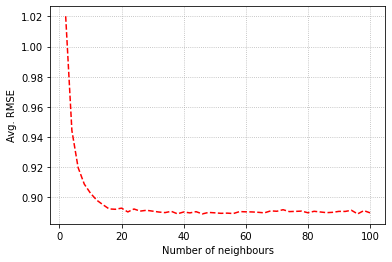

In [25]:
plt.plot(k,list_RMSE,linestyle='--',color='r')
plt.grid(linestyle=':')
plt.ylabel('Avg. RMSE')
plt.xlabel('Number of neighbours')
plt.savefig('Q10a.png',dpi=300,bbox_inches='tight')
plt.show()

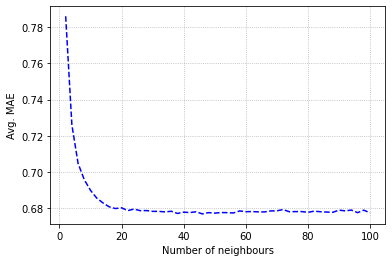

In [27]:
plt.plot(k,lisst_mae,linestyle='--',color='b')
plt.grid(linestyle=':')
plt.ylabel('Avg. MAE')
plt.xlabel('Number of neighbours')
plt.savefig('Q10b.png',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
# Question 5

#In this question, we are asked to find the minimum value of k , beyond which the errors for k-NN user-based CF
# level out. Judging from the curves in Figure 5, we see that this occurs at k = 20 , with the steady-state RMSE =
# 0.89 and steady-state MAE = 0.68 .

In [31]:
# Question 6
from surprise import accuracy

Popular_RMSE = []
k_Fold_valid =  KFold(n_splits=10)
for item in k:
    Local_RMSE = []
    print('Running for the iteration with K=',item)
    for trainset, testset in k_Fold_valid.split(Dataset_Ratings):
        Pop_Trim_list = []
        unique, counts = np.unique([row[1] for row in testset], return_counts=True)
        for i in range(len(counts)):
            if(counts[i]<=2):
                Pop_Trim_list.append(unique[i])
        Pop_Trimmed_set = [j for j in testset if j[1] not in Pop_Trim_list]
        res = KNNWithMeans(k=item,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(Pop_Trimmed_set)
        Local_RMSE.append(accuracy.rmse(res,verbose=False))
    Popular_RMSE.append(np.mean(Local_RMSE))

Running for the iteration with K= 2
Running for the iteration with K= 4
Running for the iteration with K= 6
Running for the iteration with K= 8
Running for the iteration with K= 10
Running for the iteration with K= 12
Running for the iteration with K= 14
Running for the iteration with K= 16
Running for the iteration with K= 18
Running for the iteration with K= 20
Running for the iteration with K= 22
Running for the iteration with K= 24
Running for the iteration with K= 26
Running for the iteration with K= 28
Running for the iteration with K= 30
Running for the iteration with K= 32
Running for the iteration with K= 34
Running for the iteration with K= 36
Running for the iteration with K= 38
Running for the iteration with K= 40
Running for the iteration with K= 42
Running for the iteration with K= 44
Running for the iteration with K= 46
Running for the iteration with K= 48
Running for the iteration with K= 50
Running for the iteration with K= 52
Running for the iteration with K= 54
Runni

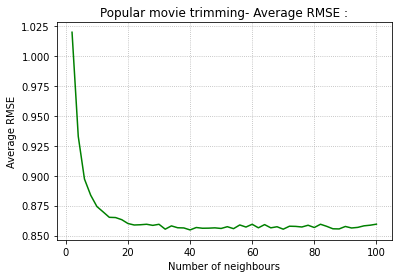

In [34]:
plt.plot(k,Popular_RMSE,color='g')
plt.grid(linestyle=':')
plt.title('Popular movie trimming- Average RMSE :')
plt.ylabel('Average RMSE')
plt.xlabel('Number of neighbours')
plt.savefig('Q12.png',dpi=300,bbox_inches='tight')
plt.show()

In [33]:
print("RMSE- Popular movie trimming- Minimum avg. :", min(Popular_RMSE))


RMSE- Popular movie trimming- Minimum avg. : 0.8546786823828751


In [36]:
UnPopular_RMSE = []
k_Fold_valid =  KFold(n_splits=10)
for item in k:
    Local_RMSE = []
    print('Running for the iteration with K=',item)
    for trainset, testset in k_Fold_valid.split(Dataset_Ratings):
        Unpop_trim_list = []
        unique, counts = np.unique([row[1] for row in testset], return_counts=True)
        for i in range(len(counts)):
            if(counts[i]>2):
                Unpop_trim_list.append(unique[i])
        Unpop_trimmed_set = [j for j in testset if j[1] not in Unpop_trim_list]
        Unpop_res = KNNWithMeans(k=item,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(Unpop_trimmed_set)
        Local_RMSE.append(accuracy.rmse(Unpop_res,verbose=False))
    UnPopular_RMSE.append(np.mean(Local_RMSE))

Running for the iteration with K= 2
Running for the iteration with K= 4
Running for the iteration with K= 6
Running for the iteration with K= 8
Running for the iteration with K= 10
Running for the iteration with K= 12
Running for the iteration with K= 14
Running for the iteration with K= 16
Running for the iteration with K= 18
Running for the iteration with K= 20
Running for the iteration with K= 22
Running for the iteration with K= 24
Running for the iteration with K= 26
Running for the iteration with K= 28
Running for the iteration with K= 30
Running for the iteration with K= 32
Running for the iteration with K= 34
Running for the iteration with K= 36
Running for the iteration with K= 38
Running for the iteration with K= 40
Running for the iteration with K= 42
Running for the iteration with K= 44
Running for the iteration with K= 46
Running for the iteration with K= 48
Running for the iteration with K= 50
Running for the iteration with K= 52
Running for the iteration with K= 54
Runni

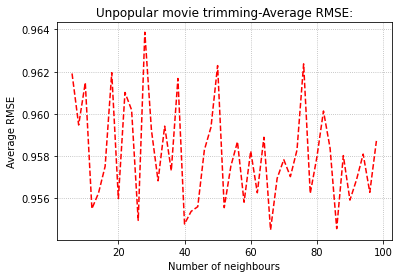

Unpopular movie trimming-Minimum average RMSE: 0.9545104839890124


In [38]:
plt.plot(k[2:-1],UnPopular_RMSE[2:-1],linestyle='--',color='r')
plt.grid(linestyle=':')
plt.title('Unpopular movie trimming-Average RMSE:')
plt.ylabel('Average RMSE')
plt.xlabel('Number of neighbours')
plt.savefig('Q13.png',dpi=300,bbox_inches='tight')
plt.show()
print("Unpopular movie trimming-Minimum average RMSE:", min(UnPopular_RMSE))


In [40]:
#High Variance Movie Trimming
High_Var_RMSE = []
k_Fold_valid =  KFold(n_splits=10)
dict_of_items = {}
for j in Dataset_Ratings.raw_ratings:
    if j[1] in dict_of_items.keys():
        dict_of_items[j[1]].append(j[2])
    else:
        dict_of_items[j[1]] = []
        dict_of_items[j[1]].append(j[2])

for item in k:
    Local_RMSE = []
    print('Running for the iteration with K =',item)
    for trainset, testset in k_Fold_valid.split(Dataset_Ratings):
        High_Var_trimmed_set = [j for j in testset if (np.var(dict_of_items[j[1]]) >= 2 and len(dict_of_items[j[1]]) >= 5)]
        Final_High_res = KNNWithMeans(k=item,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(High_Var_trimmed_set)
        Local_RMSE.append(accuracy.rmse(Final_High_res,verbose=False))
    High_Var_RMSE.append(np.mean(Local_RMSE))

Running for the iteration with K = 2
Running for the iteration with K = 4
Running for the iteration with K = 6
Running for the iteration with K = 8
Running for the iteration with K = 10
Running for the iteration with K = 12
Running for the iteration with K = 14
Running for the iteration with K = 16
Running for the iteration with K = 18
Running for the iteration with K = 20
Running for the iteration with K = 22
Running for the iteration with K = 24
Running for the iteration with K = 26
Running for the iteration with K = 28
Running for the iteration with K = 30
Running for the iteration with K = 32
Running for the iteration with K = 34
Running for the iteration with K = 36
Running for the iteration with K = 38
Running for the iteration with K = 40
Running for the iteration with K = 42
Running for the iteration with K = 44
Running for the iteration with K = 46
Running for the iteration with K = 48
Running for the iteration with K = 50
Running for the iteration with K = 52
Running for the 

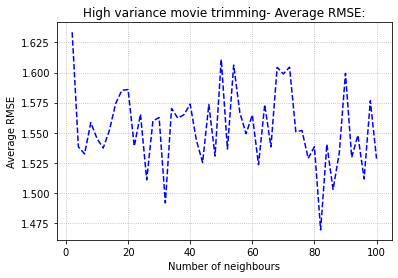

In [42]:
plt.plot(k,High_Var_RMSE,linestyle='--',color='b')
plt.grid(linestyle=':')
plt.title('High variance movie trimming- Average RMSE:')
plt.ylabel('Average RMSE')
plt.xlabel('Number of neighbours')
plt.savefig('Q14.png',dpi=300,bbox_inches='tight')
plt.show()

In [43]:
print("High variance movie trimming- Minimum average RMSE:", min(High_Var_RMSE))


High variance movie trimming- Minimum average RMSE: 1.469279756781472


In [8]:
!pip install scikit-surprise
from surprise import Reader, Dataset
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection import cross_validate, KFold, train_test_split

CSV_reader=Reader(rating_scale=(0.5, 5),skip_lines=1,sep=',', line_format='user item rating timestamp')
Dataset_Ratings=Dataset.load_from_file(Dataset_loc+'ratings.csv',reader=CSV_reader)

k = 20
Train_list, Test_list = train_test_split(Dataset_Ratings, test_size=0.1)
Thres_list = [2.5, 3.0, 3.5, 4.0]

res  = KNNWithMeans(k=k,sim_options={'name':'pearson'},verbose=False).fit(Train_list).test(Test_list)

You should consider upgrading via the 'c:\users\veera\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


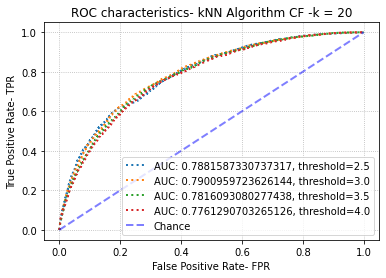

In [10]:
from sklearn.metrics import roc_curve, auc, mean_squared_error

fig, ax = plt.subplots()
for item in Thres_list:
    thresholded_out = []
    for row in res:
        if row.r_ui > item:
            thresholded_out.append(1)
        else:
            thresholded_out.append(0)
    FPR, TPR, thresholds = roc_curve(thresholded_out, [row.est for row in res])
    ax.plot(FPR, TPR,lw=2,linestyle=':',label="AUC: "+str(auc(FPR,TPR))+', threshold='+str(item))  
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='b', label='Chance', alpha=.5)  
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('ROC characteristics- kNN Algorithm CF -k = 20')
plt.ylabel('True Positive Rate- TPR')
plt.xlabel('False Positive Rate- FPR')
plt.savefig('Q6.png',dpi=350,bbox_inches='tight')
plt.show() 

In [11]:
#Question 8 maps to Question 17

NMF Iteration for value of K = 2
NMF Iteration for value of K = 4
NMF Iteration for value of K = 6
NMF Iteration for value of K = 8
NMF Iteration for value of K = 10
NMF Iteration for value of K = 12
NMF Iteration for value of K = 14
NMF Iteration for value of K = 16
NMF Iteration for value of K = 18
NMF Iteration for value of K = 20
NMF Iteration for value of K = 22
NMF Iteration for value of K = 24
NMF Iteration for value of K = 26
NMF Iteration for value of K = 28
NMF Iteration for value of K = 30
NMF Iteration for value of K = 32
NMF Iteration for value of K = 34
NMF Iteration for value of K = 36
NMF Iteration for value of K = 38
NMF Iteration for value of K = 40
NMF Iteration for value of K = 42
NMF Iteration for value of K = 44
NMF Iteration for value of K = 46
NMF Iteration for value of K = 48
NMF Iteration for value of K = 50


ValueError: x and y must have same first dimension, but have shapes (1,) and (25,)

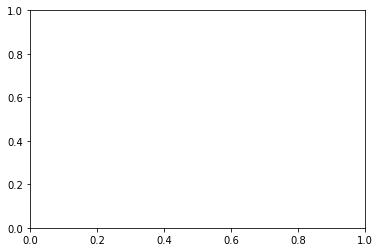

In [13]:
from surprise.prediction_algorithms.matrix_factorization import NMF, SVD

List_K = np.arange(2,52,2)
RMSE_NMF_List = []
MAE_NMF_List = []
for K_value in List_K:
    print('NMF Iteration for value of K =',K_value)
    res = cross_validate(NMF(n_factors=K_value,n_epochs=50,verbose=False),
                         measures=['rmse','mae'],data = Dataset_Ratings,cv=10,n_jobs=-1)   
    RMSE_NMF_List.append(np.mean(res['test_rmse']))
    MAE_NMF_List.append(np.mean(res['test_mae']))

plt.plot(List_K,RMSE_NMF_List,linestyle='--',color='b')
plt.grid(linestyle=':')
plt.title('Average value of RMSE for NMF')
plt.ylabel('Avgerage RMSE value')
plt.xlabel('Number of latent factors in NMF')
plt.savefig('Q8a.png',dpi=350,bbox_inches='tight')
plt.show()

In [14]:
print(len(RMSE_NMF_List))

25


In [16]:
print(len(List_K))

25


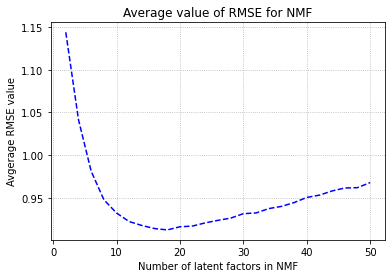

In [17]:
plt.plot(List_K,RMSE_NMF_List,linestyle='--',color='b')
plt.grid(linestyle=':')
plt.title('Average value of RMSE for NMF')
plt.ylabel('Avgerage RMSE value')
plt.xlabel('Number of latent factors in NMF')
plt.savefig('Q8a.png',dpi=350,bbox_inches='tight')
plt.show()

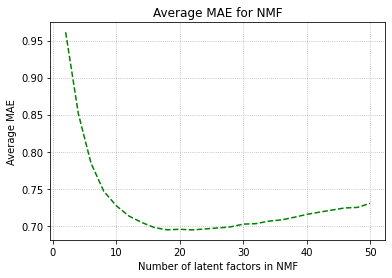

In [19]:
plt.plot(List_K,MAE_NMF_List,linestyle='--',color='g')
plt.grid(linestyle=':')
plt.title('Average MAE for NMF')
plt.ylabel('Average MAE')
plt.xlabel('Number of latent factors in NMF')
plt.savefig('Q8b.png',dpi=350,bbox_inches='tight')
plt.show()

In [21]:
print("Minimum Average value of RMSE (NMF): %f, value of K: %d" % (min(RMSE_NMF_List),List_K[[i for i, x in enumerate(RMSE_NMF_List) if x == min(RMSE_NMF_List)][0]]))
print("Minimum Average value of MAE (NMF): %f, value of K: %d" % (min(MAE_NMF_List),List_K[[i for i, x in enumerate(MAE_NMF_List) if x == min(MAE_NMF_List)][0]]))

Minimum Average value of RMSE (NMF): 0.912530, value of K: 18
Minimum Average value of MAE (NMF): 0.694350, value of K: 22


Iterating for the K value = 2
Iterating for the K value = 4
Iterating for the K value = 6
Iterating for the K value = 8
Iterating for the K value = 10
Iterating for the K value = 12
Iterating for the K value = 14
Iterating for the K value = 16
Iterating for the K value = 18
Iterating for the K value = 20
Iterating for the K value = 22
Iterating for the K value = 24
Iterating for the K value = 26
Iterating for the K value = 28
Iterating for the K value = 30
Iterating for the K value = 32
Iterating for the K value = 34
Iterating for the K value = 36
Iterating for the K value = 38
Iterating for the K value = 40
Iterating for the K value = 42
Iterating for the K value = 44
Iterating for the K value = 46
Iterating for the K value = 48
Iterating for the K value = 50


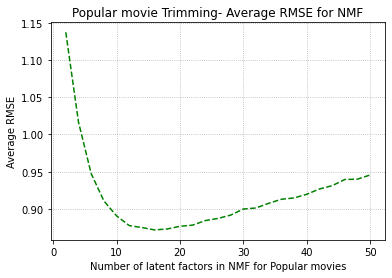

In [23]:
from surprise import Reader, Dataset, accuracy

Pop_RMSE_NMF_list = []
K_Fold =  KFold(n_splits=10)
for K_value in List_K:
    Local_RMSE = []
    print('Iterating for the K value =',K_value)
    for Train_list, Test_list in K_Fold.split(Dataset_Ratings):
        Pop_trim_list = []
        unique, counts = np.unique([row[1] for row in Test_list], return_counts=True)
        for i in range(len(counts)):
            if(counts[i]<=2):
                Pop_trim_list.append(unique[i])
        trimmed_set = [j for j in Test_list if j[1] not in Pop_trim_list]
        res = NMF(n_factors=K_value,n_epochs=50,verbose=False).fit(Train_list).test(trimmed_set)
        Local_RMSE.append(accuracy.rmse(res,verbose=False))
    Pop_RMSE_NMF_list.append(np.mean(Local_RMSE))
plt.plot(List_K,Pop_RMSE_NMF_list,linestyle='--',color='g')
plt.grid(linestyle=':')
plt.title('Popular movie Trimming- Average RMSE for NMF')
plt.ylabel('Average RMSE')
plt.xlabel('Number of latent factors in NMF for Popular movies')
plt.savefig('Q8c.png',dpi=350,bbox_inches='tight')
plt.show()

In [24]:
print("Minimum avg. RMSE (NMF, Popular movie trimming):", min(Pop_RMSE_NMF_list))


Minimum avg. RMSE (NMF, Popular movie trimming): 0.8717896764681179


In [26]:
UnPop_RMSE_NMF = []
k_Fold =  KFold(n_splits=10)
for K_Value in List_K:
    Local_RMSE = []
    print('Iteration for the value of K =',K_Value)
    for Train_list, Test_list in k_Fold.split(Dataset_Ratings):
        trim_list = []
        unique, counts = np.unique([row[1] for row in Test_list], return_counts=True)
        for i in range(len(counts)):
            if(counts[i]>2):
                trim_list.append(unique[i])
        trimmed_set = [j for j in Test_list if j[1] not in trim_list]
        res = NMF(n_factors=K_Value,n_epochs=50,verbose=False).fit(Train_list).test(trimmed_set)
        Local_RMSE.append(accuracy.rmse(res,verbose=False))
    UnPop_RMSE_NMF.append(np.mean(Local_RMSE))

Iteration for the value of K = 2
Iteration for the value of K = 4
Iteration for the value of K = 6
Iteration for the value of K = 8
Iteration for the value of K = 10
Iteration for the value of K = 12
Iteration for the value of K = 14
Iteration for the value of K = 16
Iteration for the value of K = 18
Iteration for the value of K = 20
Iteration for the value of K = 22
Iteration for the value of K = 24
Iteration for the value of K = 26
Iteration for the value of K = 28
Iteration for the value of K = 30
Iteration for the value of K = 32
Iteration for the value of K = 34
Iteration for the value of K = 36
Iteration for the value of K = 38
Iteration for the value of K = 40
Iteration for the value of K = 42
Iteration for the value of K = 44
Iteration for the value of K = 46
Iteration for the value of K = 48
Iteration for the value of K = 50


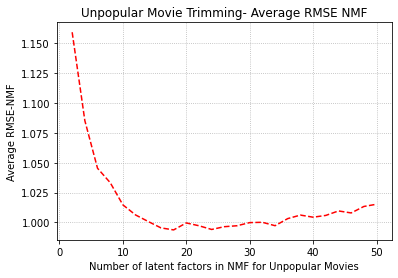

In [27]:
plt.plot(List_K,UnPop_RMSE_NMF,linestyle='--',color='r')
plt.grid(linestyle=':')
plt.title('Unpopular Movie Trimming- Average RMSE NMF')
plt.ylabel('Average RMSE-NMF')
plt.xlabel('Number of latent factors in NMF for Unpopular Movies')
plt.savefig('Q8c2.png',dpi=350,bbox_inches='tight')
plt.show()

In [28]:
print(" Unpopular movie Trimming- Minimum average RMSE -NMF", min(UnPop_RMSE_NMF))


 Unpopular movie Trimming- Minimum average RMSE -NMF 0.9937314977889666


In [30]:
Var_RMSE_NMF = []
k_Fold =  KFold(n_splits=10)
dict_of_items = {}
for j in Dataset_Ratings.raw_ratings:
    if j[1] in dict_of_items.keys():
        dict_of_items[j[1]].append(j[2])
    else:
        dict_of_items[j[1]] = []
        dict_of_items[j[1]].append(j[2])

for K_value in List_K:
    Local_RMSE = []
    print('Iteration for the value of K =',K_value)
    for Train_list, Test_list in k_Fold.split(Dataset_Ratings):
        trimmed_set = [j for j in Test_list if (np.var(dict_of_items[j[1]]) >= 2 and len(dict_of_items[j[1]]) >= 5)]
        res = NMF(n_factors=K_value,n_epochs=50,verbose=False).fit(Train_list).test(trimmed_set)
        Local_RMSE.append(accuracy.rmse(res,verbose=False))
    Var_RMSE_NMF.append(np.mean(Local_RMSE))

Iteration for the value of K = 2
Iteration for the value of K = 4
Iteration for the value of K = 6
Iteration for the value of K = 8
Iteration for the value of K = 10
Iteration for the value of K = 12
Iteration for the value of K = 14
Iteration for the value of K = 16
Iteration for the value of K = 18
Iteration for the value of K = 20
Iteration for the value of K = 22
Iteration for the value of K = 24
Iteration for the value of K = 26
Iteration for the value of K = 28
Iteration for the value of K = 30
Iteration for the value of K = 32
Iteration for the value of K = 34
Iteration for the value of K = 36
Iteration for the value of K = 38
Iteration for the value of K = 40
Iteration for the value of K = 42
Iteration for the value of K = 44
Iteration for the value of K = 46
Iteration for the value of K = 48
Iteration for the value of K = 50


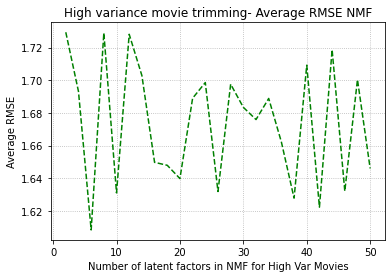

In [31]:
plt.plot(List_K,Var_RMSE_NMF,linestyle='--',color='g')
plt.grid(linestyle=':')
plt.title('High variance movie trimming- Average RMSE NMF')
plt.ylabel('Average RMSE')
plt.xlabel('Number of latent factors in NMF for High Var Movies')
plt.savefig('Q8c3.png',dpi=350,bbox_inches='tight')
plt.show()

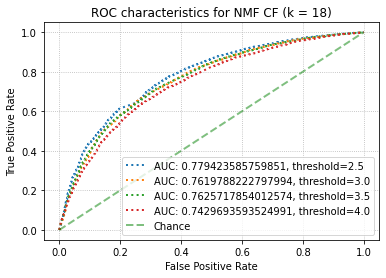

In [34]:
k = List_K[[i for i, x in enumerate(RMSE_NMF_List) if x == min(RMSE_NMF_List)][0]]
Thresh_List = [2.5, 3.0, 3.5, 4.0]
Train_list, Test_list = train_test_split(Dataset_Ratings, test_size=0.1)
res  = NMF(n_factors=k,n_epochs=50,verbose=False).fit(Train_list).test(Test_list)

fig, ax = plt.subplots()
for item in Thresh_List:
    thresholded_out = []
    for row in res:
        if row.r_ui > item:
            thresholded_out.append(1)
        else:
            thresholded_out.append(0)
    fpr, tpr, thresholds = roc_curve(thresholded_out, [row.est for row in res])
    ax.plot(fpr, tpr,lw=2,linestyle=':',label="AUC: "+str(auc(fpr,tpr))+', threshold='+str(item))  
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='g', label='Chance', alpha=.5)  
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('ROC characteristics for NMF CF (k = 18)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('Q8d.png',dpi=350,bbox_inches='tight')
plt.show() 


In [37]:
#Question 9
genre = pd.read_csv(Dataset_loc+'movies.csv',usecols=['movieId','title','genres'])
Train_list, Test_list = train_test_split(Dataset_Ratings, test_size=0.1)
NMF_K20 = NMF(n_factors=20,n_epochs=50,verbose=False)
NMF_K20.fit(Train_list).test(Test_list)
U_mat = NMF_K20.pu
V_mat = NMF_K20.qi

cols = [1,3,5,7,11,15,19]
for item in cols:
    print('Column number correspoding to V Matrix Instance: ',item)
    selected_col = V_mat[:,item]
    sorted_col = np.argsort(selected_col)[::-1]
    for i in sorted_col[0:10]:
        print(genre['genres'][i])
    print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')

Column number correspoding to V Matrix Instance:  1
Action|Drama
Animation|Comedy|Sci-Fi
Crime|Drama
Action|Comedy
Comedy
Drama
Adventure|Thriller
Comedy|Sci-Fi
Comedy|Drama
Action|Comedy|Crime|Thriller
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Column number correspoding to V Matrix Instance:  3
Thriller
Drama
Drama
Horror
Children|Comedy
Crime|Thriller
Drama|Musical
Drama|Romance
Comedy|Fantasy
Drama|War
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Column number correspoding to V Matrix Instance:  5
Adventure|Children|Comedy
Drama|Musical
Drama
Comedy|Musical
Drama
Crime|Drama|Mystery|Thriller
Comedy
Comedy|Drama|Romance
Comedy|Crime|Drama|Mystery|Romance
Drama
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Column number correspoding to V Matrix Instance:  7
Comedy
Drama|Romance
Animation|Children|Comedy|Musical
Adventure|Animation|Children|Comedy|Drama|Musical|Romance
Drama|Romance
Comedy|Romance
Action|Adventure|Sci-Fi|IMAX
Action|Adventure|Drama|Sci-F

In [39]:
#Question 10
#MF Collaborative Filter
#Treat MF with bias/regularization as SVD kind of optimization problem 

List_K = np.arange(2,52,2)
RMSE_MF_SVD = []
MAE_MF_SVD = []
for item in List_K:
    print('Iteration for the value of K =',item)
    res = cross_validate(SVD(n_factors=item,n_epochs=20,verbose=False),
                         measures=['rmse','mae'],data = Dataset_Ratings,cv=10,n_jobs=-1)   
    RMSE_MF_SVD.append(np.mean(res['test_rmse']))
    MAE_MF_SVD.append(np.mean(res['test_mae']))




Iteration for the value of K = 2
Iteration for the value of K = 4
Iteration for the value of K = 6
Iteration for the value of K = 8
Iteration for the value of K = 10
Iteration for the value of K = 12
Iteration for the value of K = 14
Iteration for the value of K = 16
Iteration for the value of K = 18
Iteration for the value of K = 20
Iteration for the value of K = 22
Iteration for the value of K = 24
Iteration for the value of K = 26
Iteration for the value of K = 28
Iteration for the value of K = 30
Iteration for the value of K = 32
Iteration for the value of K = 34
Iteration for the value of K = 36
Iteration for the value of K = 38
Iteration for the value of K = 40
Iteration for the value of K = 42
Iteration for the value of K = 44
Iteration for the value of K = 46
Iteration for the value of K = 48
Iteration for the value of K = 50


NameError: name 'rmse_SVD' is not defined

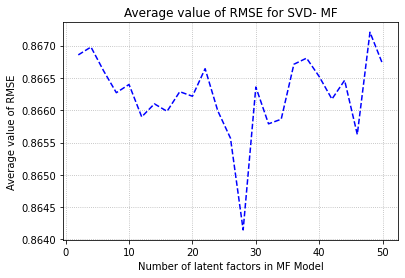

In [41]:
plt.plot(List_K,RMSE_MF_SVD,linestyle='--',color='b')
plt.grid(linestyle=':')
plt.title('Average value of RMSE for SVD- MF')
plt.ylabel('Average value of RMSE')
plt.xlabel('Number of latent factors in MF Model')
plt.savefig('Q10a.png',dpi=350,bbox_inches='tight')
plt.show()

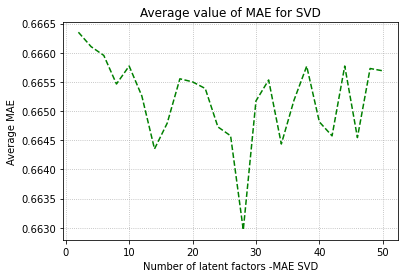

In [42]:
plt.plot(List_K,MAE_MF_SVD,linestyle='--',color='g')
plt.grid(linestyle=':')
plt.title('Average value of MAE for SVD')
plt.ylabel('Average MAE')
plt.xlabel('Number of latent factors -MAE SVD')
plt.savefig('Q10a2.png',dpi=350,bbox_inches='tight')
plt.show()

In [44]:
#Question 10 b
print("Minimum average value of RMSE for SVD: %f, K Value: %d" % (min(RMSE_MF_SVD),List_K[[i for i, x in enumerate(RMSE_MF_SVD) if x == min(RMSE_MF_SVD)][0]]))
print("Minimum average value of MAE for SVD: %f, K Value: %d" % (min(MAE_MF_SVD),List_K[[i for i, x in enumerate(MAE_MF_SVD) if x == min(MAE_MF_SVD)][0]]))

Minimum average value of RMSE for SVD: 0.864148, K Value: 28
Minimum average value of MAE for SVD: 0.662963, K Value: 28


Popular RMSE SVD Computation
Iteration for the value of K = 2
Iteration for the value of K = 4
Iteration for the value of K = 6
Iteration for the value of K = 8
Iteration for the value of K = 10
Iteration for the value of K = 12
Iteration for the value of K = 14
Iteration for the value of K = 16
Iteration for the value of K = 18
Iteration for the value of K = 20
Iteration for the value of K = 22
Iteration for the value of K = 24
Iteration for the value of K = 26
Iteration for the value of K = 28
Iteration for the value of K = 30
Iteration for the value of K = 32
Iteration for the value of K = 34
Iteration for the value of K = 36
Iteration for the value of K = 38
Iteration for the value of K = 40
Iteration for the value of K = 42
Iteration for the value of K = 44
Iteration for the value of K = 46
Iteration for the value of K = 48
Iteration for the value of K = 50


ValueError: x and y must have same first dimension, but have shapes (1,) and (25,)

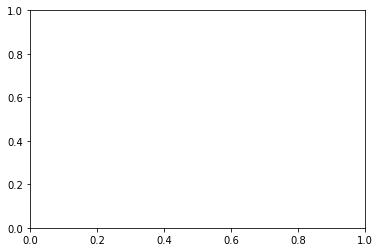

In [46]:
#Question 10c
Popular_RMSE_SVD = []
k_fold =  KFold(n_splits=10)
print('Popular RMSE SVD Computation')
for item in List_K:
    Local_RMSE = []
    print('Iteration for the value of K =',item)
    for Train_list, Test_list in k_fold.split(Dataset_Ratings):
        trim_list = []
        unique, counts = np.unique([row[1] for row in Test_list], return_counts=True)
        for i in range(len(counts)):
            if(counts[i]<=2):
                trim_list.append(unique[i])
        trimmed_set = [j for j in Test_list if j[1] not in trim_list]
        res = SVD(n_factors=item,n_epochs=20,verbose=False).fit(Train_list).test(trimmed_set)
        Local_RMSE.append(accuracy.rmse(res,verbose=False))
    Popular_RMSE_SVD.append(np.mean(Local_RMSE))



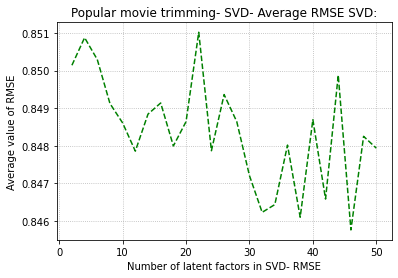

In [47]:
plt.plot(List_K,Popular_RMSE_SVD,linestyle='--',color='g')
plt.grid(linestyle=':')
plt.title('Popular movie trimming- SVD- Average RMSE SVD:')
plt.ylabel('Average value of RMSE')
plt.xlabel('Number of latent factors in SVD- RMSE')
plt.savefig('Q10c.png',dpi=300,bbox_inches='tight')
plt.show()

In [48]:
print("Popular movie trimming- Minimum average value of RMSE- SVD", min(Popular_RMSE_SVD))


Popular movie trimming- Minimum average value of RMSE- SVD 0.845756044852467


In [51]:
Unpop_RMSE_SVD = []
k_fold =  KFold(n_splits=10)
for item in List_K:
    Local_RMSE = []
    print('Iteration for the value of K =',item)
    for Train_list, Test_list in k_fold.split(Dataset_Ratings):
        Trim_List = []
        unique, counts = np.unique([row[1] for row in Test_list], return_counts=True)
        for i in range(len(counts)):
            if(counts[i]>2):
                Trim_List.append(unique[i])
        trimmed_set = [j for j in Test_list if j[1] not in Trim_List]
        res = SVD(n_factors=item,n_epochs=20,verbose=False).fit(Train_list).test(trimmed_set)
        Local_RMSE.append(accuracy.rmse(res,verbose=False))
    Unpop_RMSE_SVD.append(np.mean(Local_RMSE))


Iteration for the value of K = 2
Iteration for the value of K = 4
Iteration for the value of K = 6
Iteration for the value of K = 8
Iteration for the value of K = 10
Iteration for the value of K = 12
Iteration for the value of K = 14
Iteration for the value of K = 16
Iteration for the value of K = 18
Iteration for the value of K = 20
Iteration for the value of K = 22
Iteration for the value of K = 24
Iteration for the value of K = 26
Iteration for the value of K = 28
Iteration for the value of K = 30
Iteration for the value of K = 32
Iteration for the value of K = 34
Iteration for the value of K = 36
Iteration for the value of K = 38
Iteration for the value of K = 40
Iteration for the value of K = 42
Iteration for the value of K = 44
Iteration for the value of K = 46
Iteration for the value of K = 48
Iteration for the value of K = 50


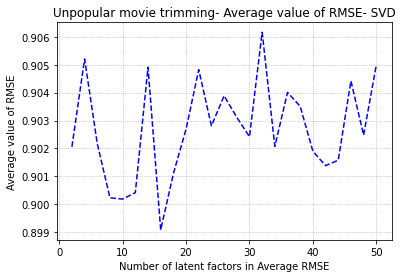

In [52]:
plt.plot(List_K,Unpop_RMSE_SVD,linestyle='--',color='b')
plt.grid(linestyle=':')
plt.title('Unpopular movie trimming- Average value of RMSE- SVD')
plt.ylabel('Average value of RMSE')
plt.xlabel('Number of latent factors in Average RMSE')
plt.savefig('Q10c2.png',dpi=350,bbox_inches='tight')
plt.show()

In [53]:
print("Unpopular movie trimming- Minimum average value of RMSE -SVD):", min(Unpop_RMSE_SVD))

Unpopular movie trimming- Minimum average value of RMSE -SVD): 0.8990743052146224


In [54]:
High_Var_RMSE_SVD = []
k_fold =  KFold(n_splits=10)
dict_of_items = {}
for j in Dataset_Ratings.raw_ratings:
    if j[1] in dict_of_items.keys():
        dict_of_items[j[1]].append(j[2])
    else:
        dict_of_items[j[1]] = []
        dict_of_items[j[1]].append(j[2])

for item in List_K:
    Local_RMSE = []
    print('Iteration for the value of K =',item)
    for Train_list, Test_list in k_fold.split(Dataset_Ratings):
        Var_trim_set = [j for j in Test_list if (np.var(dict_of_items[j[1]]) >= 2 and len(dict_of_items[j[1]]) >= 5)]
        res = SVD(n_factors=item,n_epochs=20,verbose=False).fit(Train_list).test(Var_trim_set)
        Local_RMSE.append(accuracy.rmse(res,verbose=False))
    High_Var_RMSE_SVD.append(np.mean(Local_RMSE))

Iteration for the value of K = 2
Iteration for the value of K = 4
Iteration for the value of K = 6
Iteration for the value of K = 8
Iteration for the value of K = 10
Iteration for the value of K = 12
Iteration for the value of K = 14
Iteration for the value of K = 16
Iteration for the value of K = 18
Iteration for the value of K = 20
Iteration for the value of K = 22
Iteration for the value of K = 24
Iteration for the value of K = 26
Iteration for the value of K = 28
Iteration for the value of K = 30
Iteration for the value of K = 32
Iteration for the value of K = 34
Iteration for the value of K = 36
Iteration for the value of K = 38
Iteration for the value of K = 40
Iteration for the value of K = 42
Iteration for the value of K = 44
Iteration for the value of K = 46
Iteration for the value of K = 48
Iteration for the value of K = 50


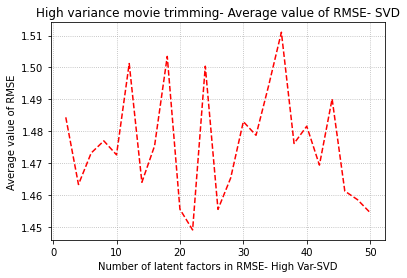

In [55]:
plt.plot(List_K,High_Var_RMSE_SVD,linestyle='--',color='r')
plt.grid(linestyle=':')
plt.title('High variance movie trimming- Average value of RMSE- SVD')
plt.ylabel('Average value of RMSE')
plt.xlabel('Number of latent factors in RMSE- High Var-SVD')
plt.savefig('Q10c3.png',dpi=300,bbox_inches='tight')
plt.show()

In [56]:
print("High variance movie trimming- Minimum average value of RMSE- SVD", min(High_Var_RMSE_SVD))


High variance movie trimming- Minimum average value of RMSE- SVD 1.4489840651169374


In [68]:
#Question 10d
# Use K's value found in Question b to find ROC curves and associated areas

K_Value = List_K[[i for i, x in enumerate(RMSE_MF_SVD) if x == min(RMSE_MF_SVD)][0]]
thres = [2.5, 3.0, 3.5, 4.0]
Train_list, Test_list = train_test_split(Dataset_Ratings, test_size=0.1)
res  = SVD(n_factors=K_Value,n_epochs=20,verbose=False).fit(Train_list).test(Test_list)

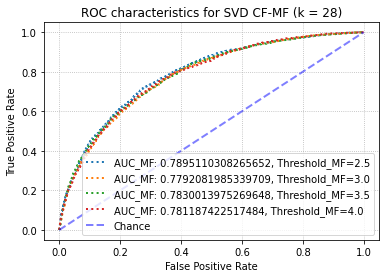

In [69]:
fig, ax = plt.subplots()
for thres_val in thres:
    thresholded_out = []
    for row in res:
        if row.r_ui > thres_val:
            thresholded_out.append(1)
        else:
            thresholded_out.append(0)
    FPR_MF, TPR_MF, thresholds = roc_curve(thresholded_out, [row.est for row in res])
    ax.plot(FPR_MF, TPR_MF,lw=2,linestyle=':',label="AUC_MF: "+str(auc(FPR_MF,TPR_MF))+', Threshold_MF='+str(thres_val))  
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='b', label='Chance', alpha=.5)  
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('ROC characteristics for SVD CF-MF (k = '+ str(K_Value)+')')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('Q10d.png',dpi=350,bbox_inches='tight')
plt.show()

In [70]:
Set_User_ID = list(set(user_ID))
Mean_user_Ratings = []
for User_idx in Set_User_ID:
    idx = np.where(user_ID == User_idx)
    Mean_user_Ratings.append(np.mean(Rating[idx]))

In [62]:
k_fold = KFold(n_splits=10)
Local_RMSE = []
for Train_list, Test_list in k_fold.split(Dataset_Ratings):
    res = [Mean_user_Ratings[int(row[0])-1] for row in Test_list]
    gt = [row[2] for row in Test_list]
    Local_RMSE.append(mean_squared_error(gt,res,squared=False))
Naive_CF_RMSE = np.mean(Local_RMSE)
print('Average RMSE value for Naive Collaborative Filtering: ',Naive_CF_RMSE)


Average RMSE value for Naive Collaborative Filtering:  0.934689278702231


In [63]:
Popular_Naive_CF_Local_RMSE = []
k_fold =  KFold(n_splits=10)
for Train_list, Test_list in k_fold.split(Dataset_Ratings):
    trim_list = []
    unique, counts = np.unique([row[1] for row in Test_list], return_counts=True)
    for i in range(len(counts)):
        if(counts[i]<=2):
            trim_list.append(unique[i])
    trimmed_set = [j for j in Test_list if j[1] not in trim_list]
    res = [Mean_user_Ratings[int(row[0])-1] for row in trimmed_set]
    gt = [row[2] for row in trimmed_set]
    Popular_Naive_CF_Local_RMSE.append(mean_squared_error(gt,res,squared=False))
Pop_Naive_CF_RMSE = np.mean(Popular_Naive_CF_Local_RMSE)
print('Popular movie trimming- Average RMSE value for Naive Filtering: ',Pop_Naive_CF_RMSE)


Popular movie trimming- Average RMSE value for Naive Filtering:  0.9227983873400081


In [64]:
UnPopular_Naive_CF_Local_RMSE = []
k_fold =  KFold(n_splits=10)
for Train_list, Test_list in k_fold.split(Dataset_Ratings):
    trim_list = []
    unique, counts = np.unique([row[1] for row in Test_list], return_counts=True)
    for i in range(len(counts)):
        if(counts[i]>2):
            trim_list.append(unique[i])
    trimmed_set = [j for j in Test_list if j[1] not in trim_list]
    res = [Mean_user_Ratings[int(row[0])-1] for row in trimmed_set]
    gt = [row[2] for row in trimmed_set]
    UnPopular_Naive_CF_Local_RMSE.append(mean_squared_error(gt,res,squared=False))
UnPop_Naive_CF_RMSE = np.mean(UnPopular_Naive_CF_Local_RMSE)
print('Unpopular movie trimming- Average RMSE value for Naive Filtering: ',UnPop_Naive_CF_RMSE)


Unpopular movie trimming- Average RMSE value for Naive Filtering:  0.958508801778447


In [66]:
High_Var_Naive_CF_Local_RMSE = []
k_fold =  KFold(n_splits=10)
dict_of_items = {}
for j in Dataset_Ratings.raw_ratings:
    if j[1] in dict_of_items.keys():
        dict_of_items[j[1]].append(j[2])
    else:
        dict_of_items[j[1]] = []
        dict_of_items[j[1]].append(j[2])

for Train_list, Test_list in k_fold.split(Dataset_Ratings):
    trimmed_set = [j for j in Test_list if (np.var(dict_of_items[j[1]]) >= 2 and len(dict_of_items[j[1]]) >= 5)]
    res = [Mean_user_Ratings[int(row[0])-1] for row in trimmed_set]
    gt = [row[2] for row in trimmed_set]
    High_Var_Naive_CF_Local_RMSE.append(mean_squared_error(gt,res,squared=False))
High_Var_Naive_CF_RMSE = np.mean(High_Var_Naive_CF_Local_RMSE)
print('High Variance movie trimming- Average RMSE value for Naive Filtering: ',High_Var_Naive_CF_RMSE)


High Variance movie trimming- Average RMSE value for Naive Filtering:  1.481603271265438


In [73]:
Train_list, Test_list = train_test_split(Dataset_Ratings, test_size=0.1)
SVD_Result  = SVD(n_factors=28,n_epochs=20,verbose=False).fit(Train_list).test(Test_list)
NMF_Result  = NMF(n_factors=18,n_epochs=50,verbose=False).fit(Train_list).test(Test_list)
KNNMeans_Result = KNNWithMeans(k=20,sim_options={'name':'pearson'},verbose=False).fit(Train_list).test(Test_list)

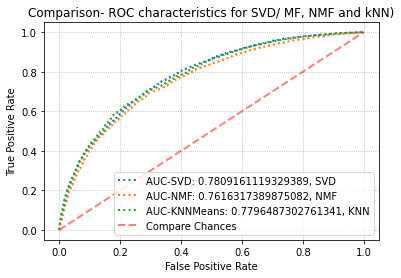

In [75]:
fig, ax = plt.subplots()
Thresholded_Result = []
for row in SVD_Result:
    if row.r_ui > 3:
        Thresholded_Result.append(1)
    else:
        Thresholded_Result.append(0)
FPR_SVD, TPR_SVD, thresholds = roc_curve(Thresholded_Result, [row.est for row in SVD_Result])
ax.plot(FPR_SVD, TPR_SVD,lw=2,linestyle=':',label="AUC-SVD: "+str(auc(FPR_SVD,TPR_SVD))+', SVD')  

Thresholded_Result = []
for row in NMF_Result:
    if row.r_ui > 3:
        Thresholded_Result.append(1)
    else:
        Thresholded_Result.append(0)
FPR_NMF, TPR_NMF, thresholds = roc_curve(Thresholded_Result, [row.est for row in NMF_Result])
ax.plot(FPR_NMF, TPR_NMF,lw=2,linestyle=':',label="AUC-NMF: "+str(auc(FPR_NMF,TPR_NMF))+', NMF')  

Thresholded_Result = []
for row in KNNMeans_Result:
    if row.r_ui > 3:
        Thresholded_Result.append(1)
    else:
        Thresholded_Result.append(0)
FPR_KNNMeans, TPR_KNNMeans, thresholds = roc_curve(Thresholded_Result, [row.est for row in KNNMeans_Result])
ax.plot(FPR_KNNMeans, TPR_KNNMeans,lw=2,linestyle=':',label="AUC-KNNMeans: "+str(auc(FPR_KNNMeans,TPR_KNNMeans))+', KNN')  

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Compare Chances', alpha=.5)  
plt.legend(loc='best')
plt.grid(linestyle=':')
plt.title('Comparison- ROC characteristics for SVD/ MF, NMF and kNN)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('Q12.png',dpi=350,bbox_inches='tight')
plt.show()

In [77]:
#Question 13
#Precision Recall Metrics for Different Models
K = np.arange(1,26,1)
k_fold = KFold(n_splits=10)

prec_list_KNN = []
rec_list_KNN = []
for val in K:
    print('Iterating  for the value of K =',val)
    precision_local_set = []
    recall__local_set = []
    for Train_list, Test_list in k_fold.split(Dataset_Ratings):
        D = {} #dictionary of movies liked by users
        for row in Test_list:
            if row[0] in D.keys():
                if row[2] >= 3.0:
                    D[row[0]].add(row[1])
            else:
                D[row[0]] = set()
                if row[2] >= 3.0:
                    D[row[0]].add(row[1])    
        dict_of_items = {} #dictionary of all movies rated by users
        for row in Test_list:
            if row[0] in dict_of_items.keys():
                dict_of_items[row[0]].append(row[1])
            else:
                dict_of_items[row[0]] = []
                dict_of_items[row[0]].append(row[1])
        KNN_Mod_Testlist = [row for row in Test_list if (len(dict_of_items[row[0]]) >= val and len(D[row[0]]) > 0)]
        res = KNNWithMeans(k=20,sim_options={'name':'pearson'},verbose=False).fit(Train_list).test(KNN_Mod_Testlist)
        Est_Ratings = {} #dictionary of estimated ratings by users
        for row in res:
            if row[0] in Est_Ratings.keys():
                Est_Ratings[row[0]].append((row[1],row[3]))
            else:
                Est_Ratings[row[0]] = []
                Est_Ratings[row[0]].append((row[1],row[3]))
        precision_u = []
        recall_u = []
        for item in Est_Ratings.keys():
            Set_all = Est_Ratings[item]
            Set_all = sorted(Set_all,key=lambda x:x[1],reverse=True)
            Set_K = set([row[0] for row in Set_all[0:val]])
            precision_u.append(len(Set_K.intersection(D[item]))/float(len(Set_K)))
            recall_u.append(len(Set_K.intersection(D[item]))/float(len(D[item])))
        precision_local_set.append(np.mean(precision_u))
        recall__local_set.append(np.mean(recall_u))
    prec_list_KNN.append(np.mean(precision_local_set))
    rec_list_KNN.append(np.mean(recall__local_set))

Iterating  for the value of K = 1
Iterating  for the value of K = 2
Iterating  for the value of K = 3
Iterating  for the value of K = 4
Iterating  for the value of K = 5
Iterating  for the value of K = 6
Iterating  for the value of K = 7
Iterating  for the value of K = 8
Iterating  for the value of K = 9
Iterating  for the value of K = 10
Iterating  for the value of K = 11
Iterating  for the value of K = 12
Iterating  for the value of K = 13
Iterating  for the value of K = 14
Iterating  for the value of K = 15
Iterating  for the value of K = 16
Iterating  for the value of K = 17
Iterating  for the value of K = 18
Iterating  for the value of K = 19
Iterating  for the value of K = 20
Iterating  for the value of K = 21
Iterating  for the value of K = 22
Iterating  for the value of K = 23
Iterating  for the value of K = 24
Iterating  for the value of K = 25


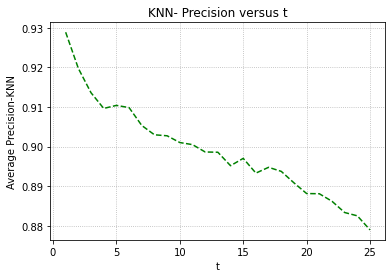

In [78]:
plt.plot(K,prec_list_KNN,linestyle='--',color='g')
plt.grid(linestyle=':')
plt.title('KNN- Precision versus t')
plt.ylabel('Average Precision-KNN')
plt.xlabel('t')
plt.savefig('Q14a1.png',dpi=350,bbox_inches='tight')
plt.show()

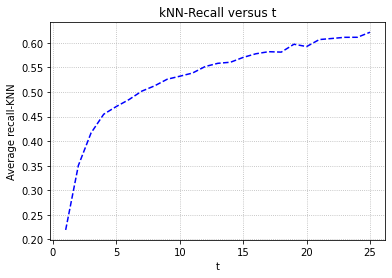

In [79]:
plt.plot(K,rec_list_KNN,linestyle='--',color='b')
plt.grid(linestyle=':')
plt.title('kNN-Recall versus t')
plt.ylabel('Average recall-KNN')
plt.xlabel('t')
plt.savefig('Q14a2.png',dpi=350,bbox_inches='tight')
plt.show()

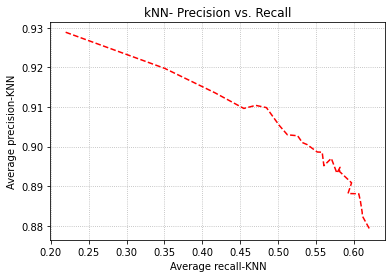

In [80]:
plt.plot(rec_list_KNN,prec_list_KNN,linestyle='--',color='r')
plt.grid(linestyle=':')
plt.title('kNN- Precision vs. Recall')
plt.ylabel('Average precision-KNN')
plt.xlabel('Average recall-KNN')
plt.savefig('Q14a3.png',dpi=300,bbox_inches='tight')
plt.show()

In [84]:
t = np.arange(1,26,1)
k_fold = KFold(n_splits=10)

prec_list_NMF = []
rec_list_NMF = []
for val in t:
    print('Iterating for the value of t =',val)
    precision_Local_set = []
    recall_Local_set = []
    for Train_list, Test_list in k_fold.split(Dataset_Ratings):
        G = {} 
        for row in Test_list:
            if row[0] in G.keys():
                if row[2] >= 3.0:
                    G[row[0]].add(row[1])
            else:
                G[row[0]] = set()
                if row[2] >= 3.0:
                    G[row[0]].add(row[1])    
        dict_of_items = {} 
        for row in Test_list:
            if row[0] in dict_of_items.keys():
                dict_of_items[row[0]].append(row[1])
            else:
                dict_of_items[row[0]] = []
                dict_of_items[row[0]].append(row[1])
        NMF_mod_testset = [row for row in Test_list if (len(dict_of_items[row[0]]) >= val and len(G[row[0]]) > 0)]
        res = NMF(n_factors=18,n_epochs=50,verbose=False).fit(Train_list).test(NMF_mod_testset)
        Est_Ratings = {} 
        for row in res:
            if row[0] in Est_Ratings.keys():
                Est_Ratings[row[0]].append((row[1],row[3]))
            else:
                Est_Ratings[row[0]] = []
                Est_Ratings[row[0]].append((row[1],row[3]))
        precision_u = []
        recall_u = []
        for item in Est_Ratings.keys():
            Set_all = Est_Ratings[item]
            Set_all = sorted(Set_all,key=lambda x:x[1],reverse=True)
            Set_t = set([row[0] for row in Set_all[0:val]])
            precision_u.append(len(Set_t.intersection(G[item]))/float(len(Set_t)))
            recall_u.append(len(Set_t.intersection(G[item]))/float(len(G[item])))
        precision_Local_set.append(np.mean(precision_u))
        recall_Local_set.append(np.mean(recall_u))
    prec_list_NMF.append(np.mean(precision_Local_set))
    rec_list_NMF.append(np.mean(recall_Local_set))

Iterating for the value of t = 1
Iterating for the value of t = 2
Iterating for the value of t = 3
Iterating for the value of t = 4
Iterating for the value of t = 5
Iterating for the value of t = 6
Iterating for the value of t = 7
Iterating for the value of t = 8
Iterating for the value of t = 9
Iterating for the value of t = 10
Iterating for the value of t = 11
Iterating for the value of t = 12
Iterating for the value of t = 13
Iterating for the value of t = 14
Iterating for the value of t = 15
Iterating for the value of t = 16
Iterating for the value of t = 17
Iterating for the value of t = 18
Iterating for the value of t = 19
Iterating for the value of t = 20
Iterating for the value of t = 21
Iterating for the value of t = 22
Iterating for the value of t = 23
Iterating for the value of t = 24
Iterating for the value of t = 25


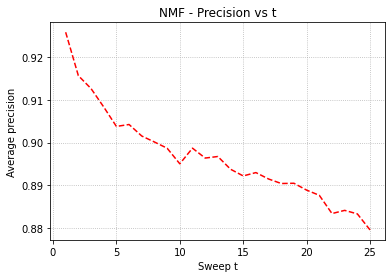

In [86]:
plt.plot(t,prec_list_NMF,linestyle='--',color='r')
plt.grid(linestyle=':')
plt.title('NMF - Precision vs t')
plt.ylabel('Average precision')
plt.xlabel('Sweep t')
plt.savefig('Q14b1.png',dpi=350,bbox_inches='tight')
plt.show()

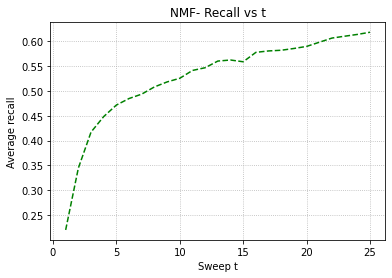

In [87]:
plt.plot(t,rec_list_NMF,linestyle='--',color='g')
plt.grid(linestyle=':')
plt.title('NMF- Recall vs t')
plt.ylabel('Average recall')
plt.xlabel('Sweep t')
plt.savefig('Q14b2.png',dpi=350,bbox_inches='tight')
plt.show()

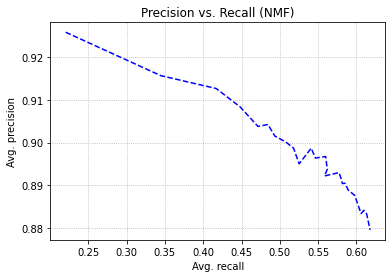

In [88]:
plt.plot(rec_list_NMF,prec_list_NMF,linestyle='--',color='b')
plt.grid(linestyle=':')
plt.title('Precision vs. Recall (NMF)')
plt.ylabel('Avg. precision')
plt.xlabel('Avg. recall')
plt.savefig('Q14b3.png',dpi=350,bbox_inches='tight')
plt.show()

In [90]:
#High Variance
t = np.arange(1,26,1)
k_fold = KFold(n_splits=10)

In [91]:
prec_list_SVD = []
rec_list_SVD = []
for val in t:
    print('Iteration for the value of t =',val)
    precision_Local_set = []
    recall_Local_set = []
    for Train_list, Test_list in k_fold.split(Dataset_Ratings):
        D = {} 
        for row in Test_list:
            if row[0] in D.keys():
                if row[2] >= 3.0:
                    D[row[0]].add(row[1])
            else:
                D[row[0]] = set()
                if row[2] >= 3.0:
                    D[row[0]].add(row[1])    
        dict_of_items = {} 
        for row in Test_list:
            if row[0] in dict_of_items.keys():
                dict_of_items[row[0]].append(row[1])
            else:
                dict_of_items[row[0]] = []
                dict_of_items[row[0]].append(row[1])
        SVD_mod_testset = [row for row in Test_list if (len(dict_of_items[row[0]]) >= val and len(D[row[0]]) > 0)]
        res = SVD(n_factors=28,n_epochs=20,verbose=False).fit(Train_list).test(SVD_mod_testset)
        Est_Ratings = {} 
        for row in res:
            if row[0] in Est_Ratings.keys():
                Est_Ratings[row[0]].append((row[1],row[3]))
            else:
                Est_Ratings[row[0]] = []
                Est_Ratings[row[0]].append((row[1],row[3]))
        precision_u = []
        recall_u = []
        for item in Est_Ratings.keys():
            Set_all = Est_Ratings[item]
            Set_all = sorted(Set_all,key=lambda x:x[1],reverse=True)
            Set_t = set([row[0] for row in Set_all[0:val]])
            precision_u.append(len(Set_t.intersection(D[item]))/float(len(Set_t)))
            recall_u.append(len(Set_t.intersection(D[item]))/float(len(D[item])))
        precision_Local_set.append(np.mean(precision_u))
        recall_Local_set.append(np.mean(recall_u))
    prec_list_SVD.append(np.mean(precision_Local_set))
    rec_list_SVD.append(np.mean(recall_Local_set))

Iteration for the value of t = 1
Iteration for the value of t = 2
Iteration for the value of t = 3
Iteration for the value of t = 4
Iteration for the value of t = 5
Iteration for the value of t = 6
Iteration for the value of t = 7
Iteration for the value of t = 8
Iteration for the value of t = 9
Iteration for the value of t = 10
Iteration for the value of t = 11
Iteration for the value of t = 12
Iteration for the value of t = 13
Iteration for the value of t = 14
Iteration for the value of t = 15
Iteration for the value of t = 16
Iteration for the value of t = 17
Iteration for the value of t = 18
Iteration for the value of t = 19
Iteration for the value of t = 20
Iteration for the value of t = 21
Iteration for the value of t = 22
Iteration for the value of t = 23
Iteration for the value of t = 24
Iteration for the value of t = 25


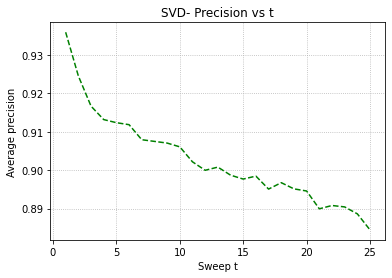

In [92]:
plt.plot(t,prec_list_SVD,linestyle='--',color='g')
plt.grid(linestyle=':')
plt.title('SVD- Precision vs t')
plt.ylabel('Average precision')
plt.xlabel('Sweep t')
plt.savefig('Q14c1.png',dpi=350,bbox_inches='tight')
plt.show()

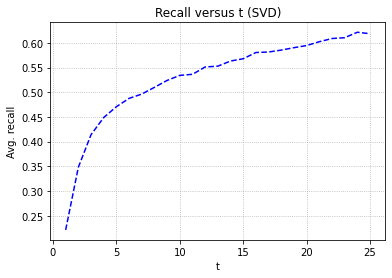

In [93]:
plt.plot(t,rec_list_SVD,linestyle='--',color='b')
plt.grid(linestyle=':')
plt.title('Recall versus t (SVD)')
plt.ylabel('Avg. recall')
plt.xlabel('t')
plt.savefig('Q14c2.png',dpi=350,bbox_inches='tight')
plt.show()


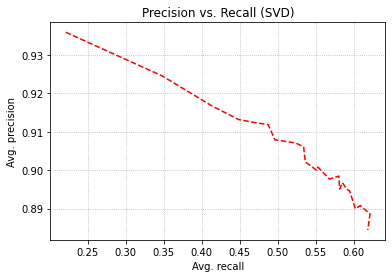

In [94]:
plt.plot(rec_list_SVD,prec_list_SVD,linestyle='--',color='r')
plt.grid(linestyle=':')
plt.title('Precision vs. Recall (SVD)')
plt.ylabel('Avg. precision')
plt.xlabel('Avg. recall')
plt.savefig('Q14c3.png',dpi=300,bbox_inches='tight')
plt.show()

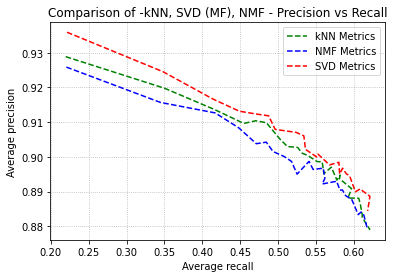

In [95]:
fig, ax = plt.subplots()
ax.plot(rec_list_KNN,prec_list_KNN,linestyle='--',color='g',label='kNN Metrics')
ax.plot(rec_list_NMF,prec_list_NMF,linestyle='--',color='b',label='NMF Metrics')
ax.plot(rec_list_SVD,prec_list_SVD,linestyle='--',color='r',label='SVD Metrics')
plt.grid(linestyle=':')
plt.title('Comparison of -kNN, SVD (MF), NMF - Precision vs Recall')
plt.ylabel('Average precision')
plt.xlabel('Average recall')
plt.legend(loc="best")
plt.savefig('Q14d.png',dpi=350,bbox_inches='tight')
plt.show()